In [147]:
# Install libraries
#!pip install tldextract

In [83]:
# Load libraries
import matplotlib.pyplot as plt
import pandas as pd
import tldextract
import numpy as np
import os

In [148]:
# Define local paths
CURRENT_DIRECTORY = os.getcwd()
GRAPH_PATH = f"{CURRENT_DIRECTORY}/graphs"

In [153]:
# Load dataset
df = pd.read_csv(f"{CURRENT_DIRECTORY}/training_data/multilingual_data_set.csv")
print(df["is_sarcastic"].value_counts())

0    41870
1    25609
Name: is_sarcastic, dtype: int64


In [123]:
# Calculate title length
df["title_length"] = df["article_title"].apply(lambda x: len(x))

# Loop over languages
for lang in ["en", "it", "nl"]:
    df_per_lang = df.loc[df['lang'] == lang]
    
    # Loop over label types (0=non-sarcastic, 1=sarcastic)
    for item in [0, 1]:
        df_per_type = df_per_lang.loc[df_per_lang["is_sarcastic"] == item]
        median_title_length = np.median(df_per_type["title_length"])
        mean_title_length = round(np.mean(df_per_type["title_length"]), 1)
        print(f"Title Statistics: lang: {lang}, is sarcastic: {item}, median length: {median_title_length}, mean length: {mean_title_length}")

median_title_length = np.median(df["title_length"])
mean_title_length = round(np.mean(df["title_length"]), 1)
print(f"Title Statistics Whole Dataset: median length: {median_title_length}, mean length: {mean_title_length}")

Title Statistics: lang: en, is sarcastic: 0, median length: 65.0, mean length: 66.1
Title Statistics: lang: en, is sarcastic: 1, median length: 70.0, mean length: 72.3
Title Statistics: lang: it, is sarcastic: 0, median length: 62.0, mean length: 63.4
Title Statistics: lang: it, is sarcastic: 1, median length: 76.0, mean length: 76.3
Title Statistics: lang: nl, is sarcastic: 0, median length: 60.0, mean length: 60.6
Title Statistics: lang: nl, is sarcastic: 1, median length: 68.0, mean length: 70.3
Title Statistics Whole Dataset: median length: 65.0, mean length: 67.0


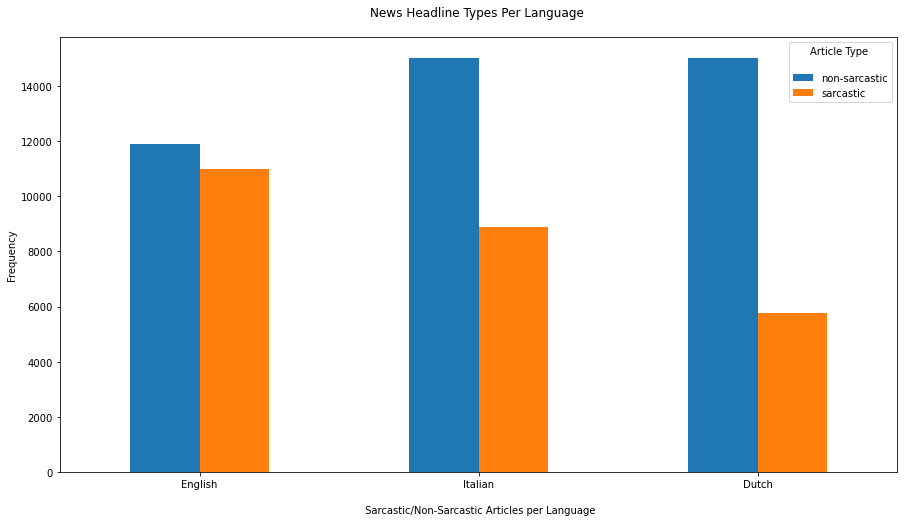

In [91]:
# Filter dataset
df_plot = df.filter(items=["is_sarcastic", "lang"])
df_plot = df_plot.reset_index()

# Conversion dict for language
lang_dict = {
    "en": "English",
    "it": "Italian",
    "nl": "Dutch",
}

# Group by language and news type and create bar plot
ax = df_plot.groupby(['lang', 'is_sarcastic'])['lang'].count().unstack().plot.bar(title="News Headline Types Per Language \n", figsize=(15, 8), align="center")

# Set axis, tick and legend names
ax.set_xlabel("\n Sarcastic/Non-Sarcastic Articles per Language")
ax.set_ylabel("Frequency")
labels = [item.get_text() for item in ax.get_xticklabels()]
edited_labels = [lang_dict[item] for item in labels if item in lang_dict]
ax.set_xticklabels(edited_labels, rotation=360)
ax.legend(labels=["non-sarcastic", "sarcastic"], title = "Article Type \n")

# Save the plot
plt.savefig(f"{GRAPH_PATH}/class_distribution_per_lang.png")

# Print the plot
plt.show()

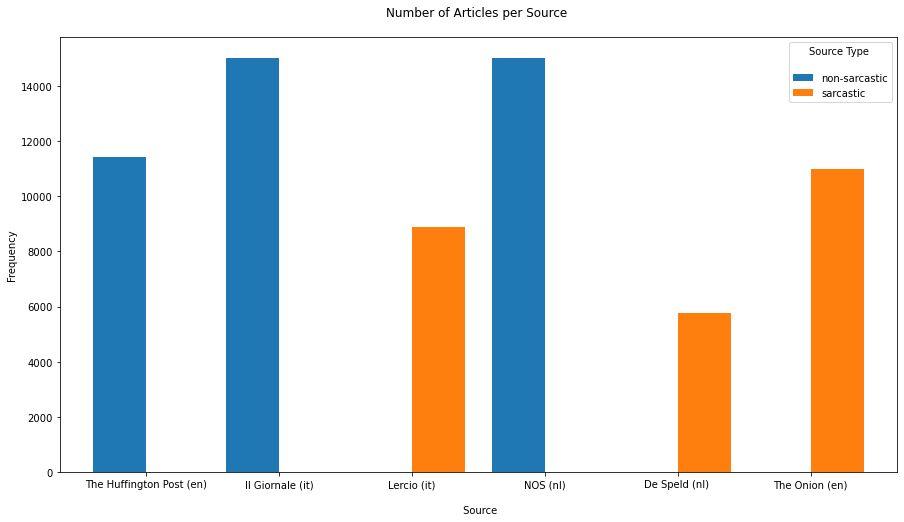

In [90]:
# Filter to only include article URL
df_domains = df.filter(items=["article_url", "is_sarcastic"])
df_domains = df_domains.reset_index()

# Conversion dict for domain names
domain_dict = {
    "nos.nl": "NOS (nl)",
    "huffingtonpost.com": "The Huffington Post (en)",
    "theonion.com": "The Onion (en)",
    "lercio.it": "Lercio (it)",
    "speld.nl": "De Speld (nl) ",
    "ilgiornale.it": "Il Giornale (it)",
}
    
list_of_domains = [item for item in domain_dict.keys()]

# Function to get domain name from URL
def get_domain(x: str) -> str:
    
    domain = ".".join(tldextract.extract(x)[1:])
    
    if domain in list_of_domains:
        return domain
    
    return None

# Get domain name
df_domains["domain"] = df_domains["article_url"].apply(lambda x: get_domain(x))
df_domains = df_domains.loc[df_domains["domain"] != None]
df_domains = df_domains.filter(items=["domain", "is_sarcastic"])
df_domains = df_domains.reset_index()

# Plot value counts per domain in bar plot
ax = df_domains.groupby(["domain", "is_sarcastic"])["domain"].count().unstack().plot.bar(title="Number of Articles per Source \n", figsize=(15, 8), width=0.8)

# Set axis names
ax.set_xlabel("\n Source")
ax.set_ylabel("Frequency")
labels = [item.get_text() for item in ax.get_xticklabels()]
edited_labels = [domain_dict[item] for item in labels if item in domain_dict]
ax.set_xticklabels(edited_labels, rotation=360)
ax.legend(labels=["non-sarcastic", "sarcastic"], title = "Source Type \n")

# Save the plot
plt.savefig(f"{GRAPH_PATH}/class_distribution_per_source.png")

# Print the plot
plt.show()

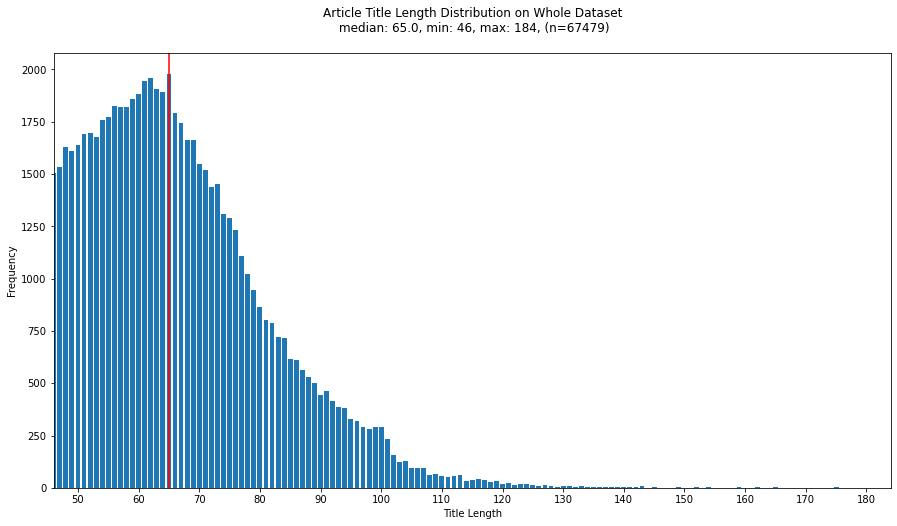

In [146]:
# Filter to only process article titles
df_titles = df.filter(items=["article_title", "is_sarcastic"])
df_titles["title_length"] = df_titles.article_title.apply(lambda x: int(len(x)))
df_titles = df_titles.reset_index()
median_length = np.median(df_titles["title_length"])
df_value_counts = df_titles["title_length"].value_counts().rename_axis("Value").reset_index(name="Frequency")

min_value = min(df_value_counts.Value)
max_value= max(df_value_counts.Value)

# Plot
fig = plt.figure(figsize = (15, 8))
plt.bar(df_value_counts.Value, df_value_counts.Frequency)
plt.xlabel("Title Length")
plt.axvline(median_length, color="red", alpha=1)
plt.ylabel("Frequency")
plt.xlim(min_value, max_value)
plt.locator_params(axis="x", nbins=20)
plt.title(label=f"Article Title Length Distribution on Whole Dataset\n median: {median_length}, min: {min_value}, max: {max_value}, (n={len(df_titles)})\n")

# Save the plot
plt.savefig(f"{GRAPH_PATH}/title_lengths_whole_dataset.png")

# Show the plot
plt.show()         

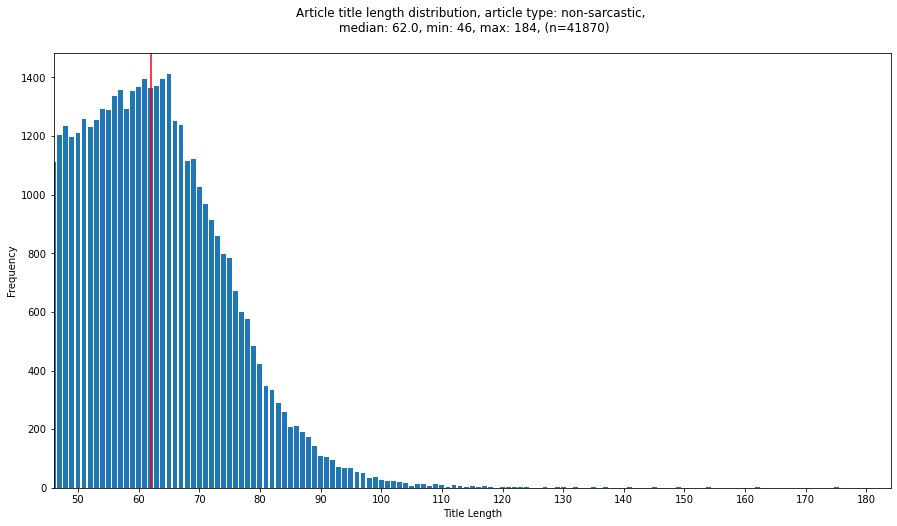

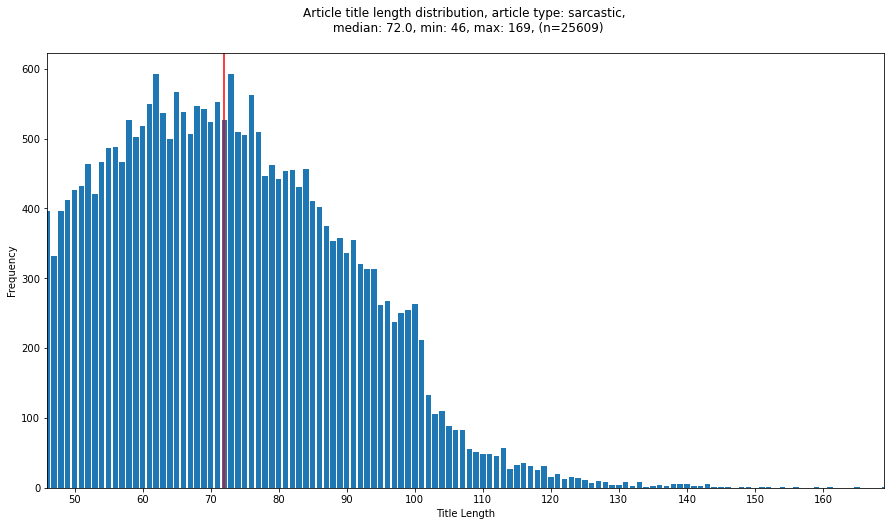

In [159]:
# Filter to only process article titles
df_titles = df.filter(items=["article_title", "is_sarcastic", "lang"])
df_titles["title_length"] = df_titles.article_title.apply(lambda x: int(len(x)))
df_titles = df_titles.reset_index()


    
# Loop over article types (0=non-sarcastic, 1=sarcastic)
for item in [0, 1]:
    df_per_type = df_titles.loc[df_titles["is_sarcastic"] == item]
    median_length = np.median(df_per_type["title_length"])
    df_value_counts = df_per_type["title_length"].value_counts().rename_axis("Value").reset_index(name="Frequency")
    article_type = "sarcastic" if item == 1 else "non-sarcastic"

    min_value = min(df_value_counts.Value)
    max_value= max(df_value_counts.Value)

    # Plot
    fig = plt.figure(figsize = (15, 8))
    plt.bar(df_value_counts.Value, df_value_counts.Frequency)
    plt.xlabel("Title Length")
    plt.axvline(median_length, color="red", alpha=1)
    plt.ylabel("Frequency")
    plt.xlim(min_value, max_value)
    plt.locator_params(axis="x", nbins=20)
    plt.title(label=f"Article title length distribution, article type: {article_type}, \n median: {median_length}, min: {min_value}, max: {max_value}, (n={len(df_per_type)})\n")

    # Save the plot
    article_type = article_type.replace("-", "_")
    plt.savefig(f"{GRAPH_PATH}/title_lengths_{article_type}.png")

    # Show the plot
    plt.show()   

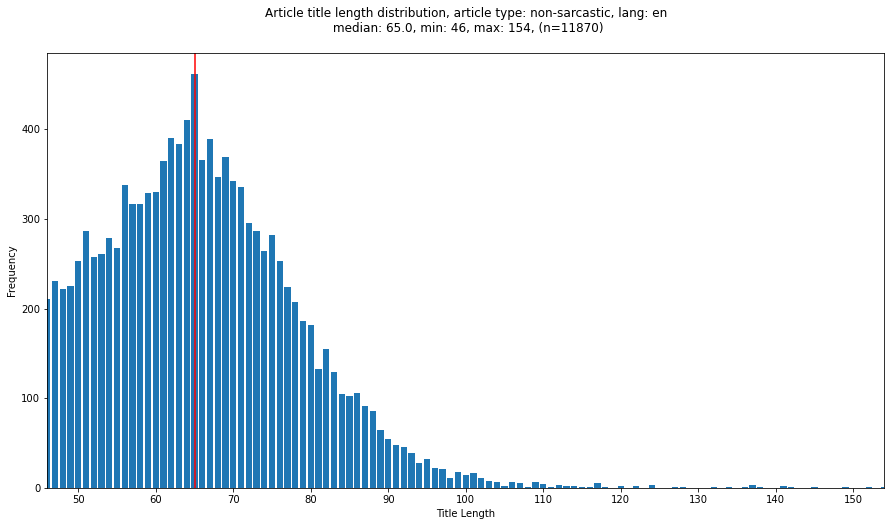

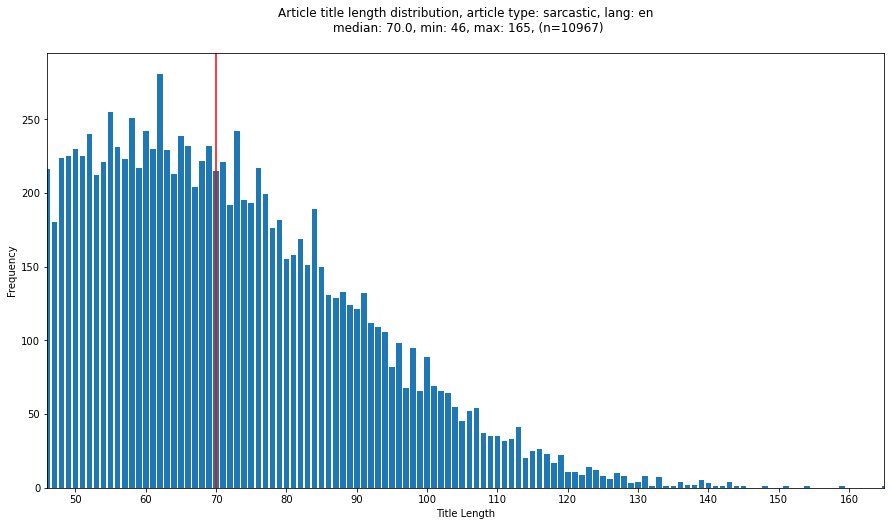

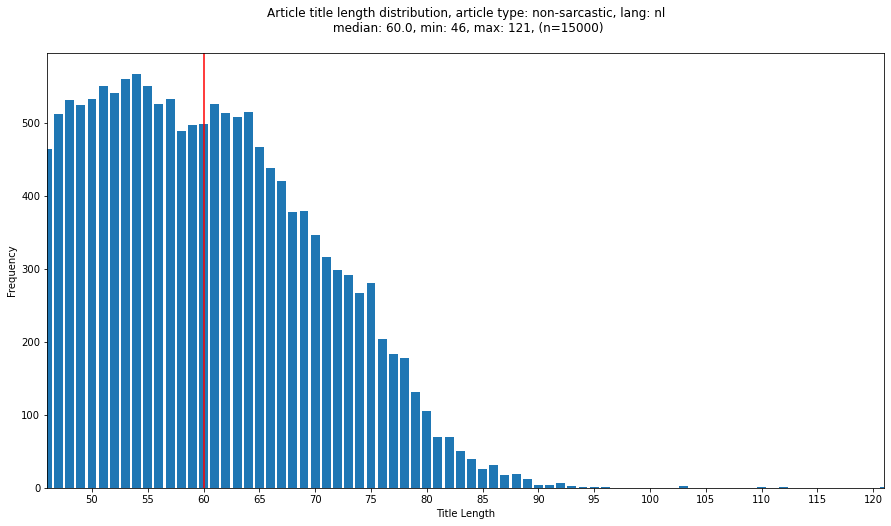

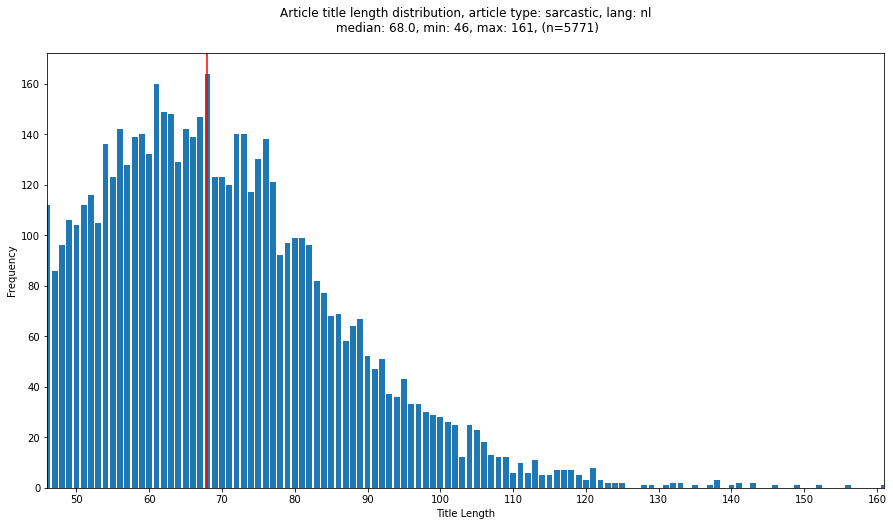

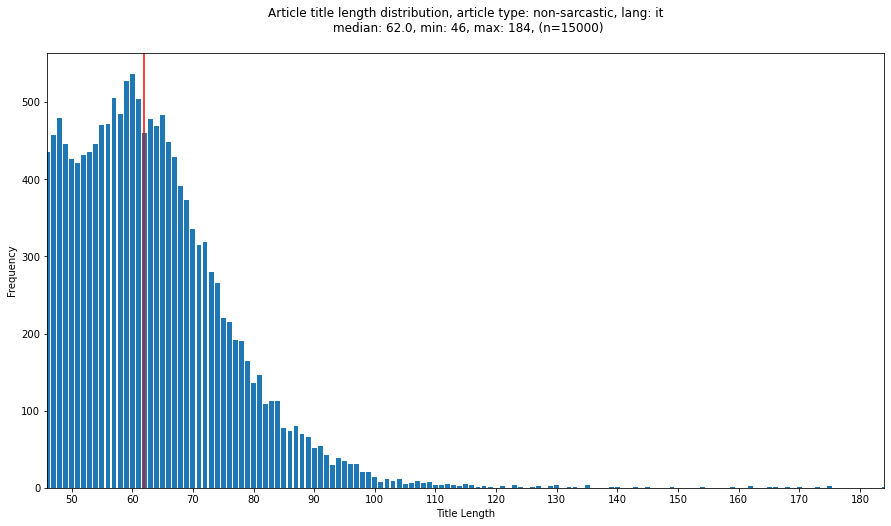

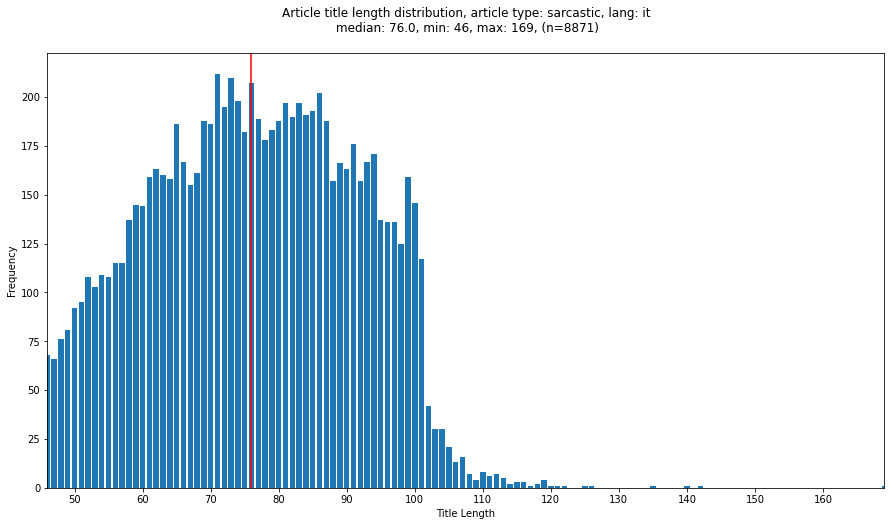

In [160]:
# Filter to only process article titles
df_titles = df.filter(items=["article_title", "is_sarcastic", "lang"])
df_titles["title_length"] = df_titles.article_title.apply(lambda x: int(len(x)))
df_titles = df_titles.reset_index()

# Loop over each language
for lang in ["en", "nl", "it"]:
    df_per_lang = df_titles.loc[df_titles["lang"] == lang]
    
    # Loop over article types (0=non-sarcastic, 1=sarcastic)
    for item in [0, 1]:
        df_per_type = df_per_lang.loc[df_per_lang["is_sarcastic"] == item]
        median_length = np.median(df_per_type["title_length"])
        df_value_counts = df_per_type["title_length"].value_counts().rename_axis("Value").reset_index(name="Frequency")
        article_type = "sarcastic" if item == 1 else "non-sarcastic"

        min_value = min(df_value_counts.Value)
        max_value= max(df_value_counts.Value)

        # Plot
        fig = plt.figure(figsize = (15, 8))
        plt.bar(df_value_counts.Value, df_value_counts.Frequency)
        plt.xlabel("Title Length")
        plt.axvline(median_length, color="red", alpha=1)
        plt.ylabel("Frequency")
        plt.xlim(min_value, max_value)
        plt.locator_params(axis="x", nbins=20)
        plt.title(label=f"Article title length distribution, article type: {article_type}, lang: {lang}\n median: {median_length}, min: {min_value}, max: {max_value}, (n={len(df_per_type)})\n")

        # Save the plot
        article_type = article_type.replace("-", "_")
        plt.savefig(f"{GRAPH_PATH}/title_lengths_{article_type}_{lang}.png")

        # Show the plot
        plt.show()   